### 2- (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1

In [1]:
import numpy as np
import cv2 as cv

#funcion para multiple deteccion
def get_multiple(img, method):

    # Leer el template y la imagen. pasar a escala de grises
    template = cv.imread('./template/pattern.png')
    template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template = cv.Canny(template,threshold1=50,threshold2=200) # Postprocesamiento parapara detección de bordes con Canny
    scores = list() # arrglo vacio para acumular ocurrencias
    temp_score, temp_result, temp_scale = None, None, None 
    patrones=0
    for factor in np.linspace(0.1, 6, 350):  # iteracion de la imagen sobre distintos factores de escala
          resize_img_gray = cv.resize(img_gray, None, fx=factor, fy=factor)   # Reescalar la imagen.
          
          if resize_img_gray.shape[0] > template.shape[0] and resize_img_gray.shape[1] > template.shape[1]:  # imagen debe ser mas grande que el template
            threshold2, _ = cv.threshold(resize_img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # Imagen binarizada (embebida - Otsu) - Parámetros: Imag_original,umbral,valor_máximo,método
            resize_img_gray = cv.Canny(resize_img_gray, 0.50 * threshold2, threshold2)  # Postprocesamiento con Canny a imagen redimensionada
            result = cv.matchTemplate(resize_img_gray, template, method)  # Busquede de coincidencia con el template.
            min_val, max_val,min_loc, max_loc = cv.minMaxLoc(result)
            if temp_score is None or max_val > temp_score:   #dependiendo el metodo se asignan maximos y minimos,score,factor  y ubicacion se guarda y es mejor al previo
                temp_score, temp_result, temp_scale = max_val, result, factor
            
            scores.append(max_val)  # se agregan los scores al areglo score
    low_thr = temp_score - 2*np.std(scores)  #Se toma de criterio estadistico el mejor score +/- 2 desviaciones standart para umbrales de coincidencia
    up_thr = temp_score + 2*np.std(scores)
    loc = np.where((temp_result <= up_thr) & (temp_result >= low_thr))

    for pt in zip(*loc[::-1]):  #plotear rectangulos en las coordenadas encontradas
        x_init = int(pt[0] / temp_scale)
        y_init = int(pt[1] / temp_scale)
        x_final = int((pt[0] + template.shape[1]) / temp_scale)
        y_final = int((pt[1] + template.shape[0]) / temp_scale)
        patrones=patrones+1 # cantidad de ocurrencias
        cv.rectangle(img_rgb,(x_init, y_init),(x_final, y_final),(0, 0, 255),2)
    return img_rgb, patrones

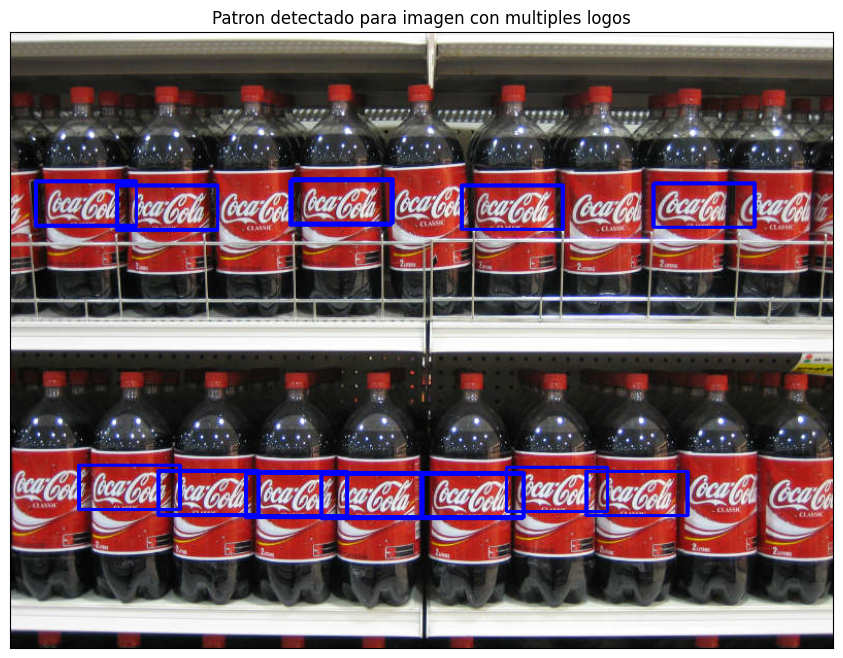

In [2]:
from matplotlib import pyplot as plt

img = cv.imread('./images/coca_multi.png')
result_img, patrones = get_multiple(img, cv.TM_CCORR_NORMED)
plt.figure(figsize=(12, 8))
plt.imshow(result_img)
plt.title('Patron detectado para imagen con multiples logos'),plt.xticks([]), plt.yticks([])
plt.show()
